<a href="https://colab.research.google.com/github/neha-rapolu001/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

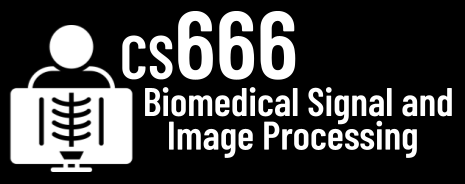

# Assignment 1

In [80]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [81]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [82]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [83]:
SAMPLING_RATE = metadata.get('sampling_rate')
SECONDS = len(signal)/SAMPLING_RATE

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

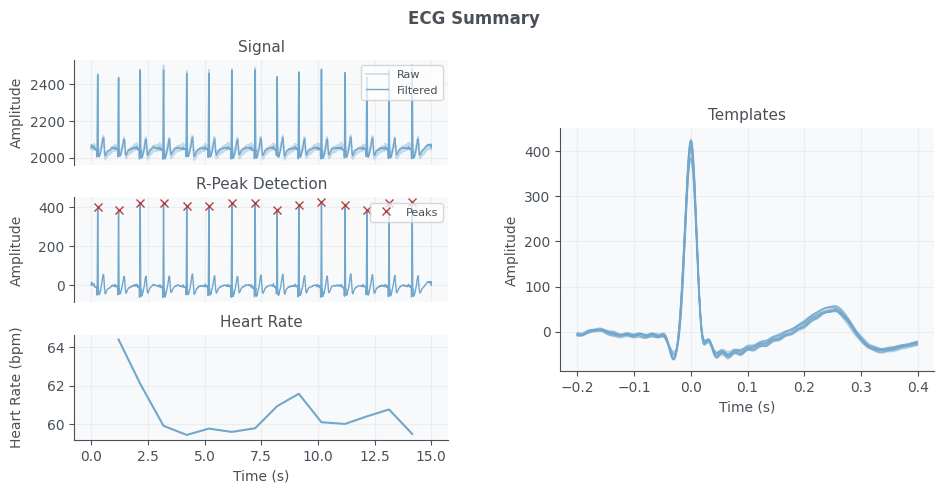

In [84]:
import biosppy
results = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

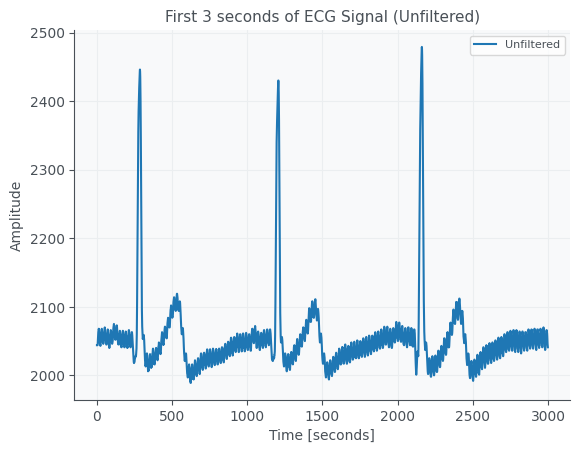

In [85]:
### TODO plot unfiltered signal

unfiltered_signal = signal[:int(3 * SAMPLING_RATE)]

plt.plot(unfiltered_signal, label="Unfiltered")

plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.title("First 3 seconds of ECG Signal (Unfiltered)")

# Show the plot
plt.legend()
plt.show()

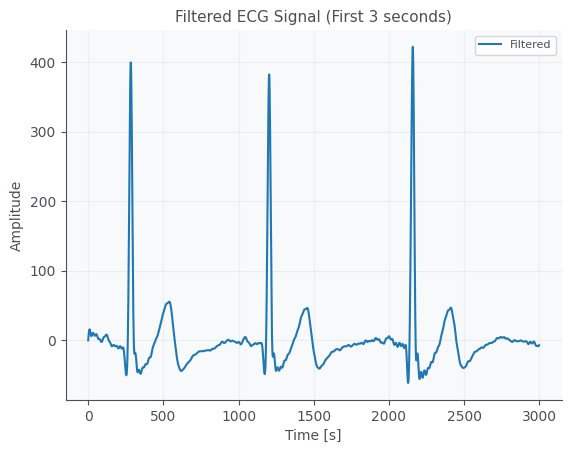

In [86]:
### TODO plot filtered signal

filtered_signal = results['filtered'][:int(3 * SAMPLING_RATE)]

plt.plot(filtered_signal, label="Filtered")
plt.title('Filtered ECG Signal (First 3 seconds)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend()
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

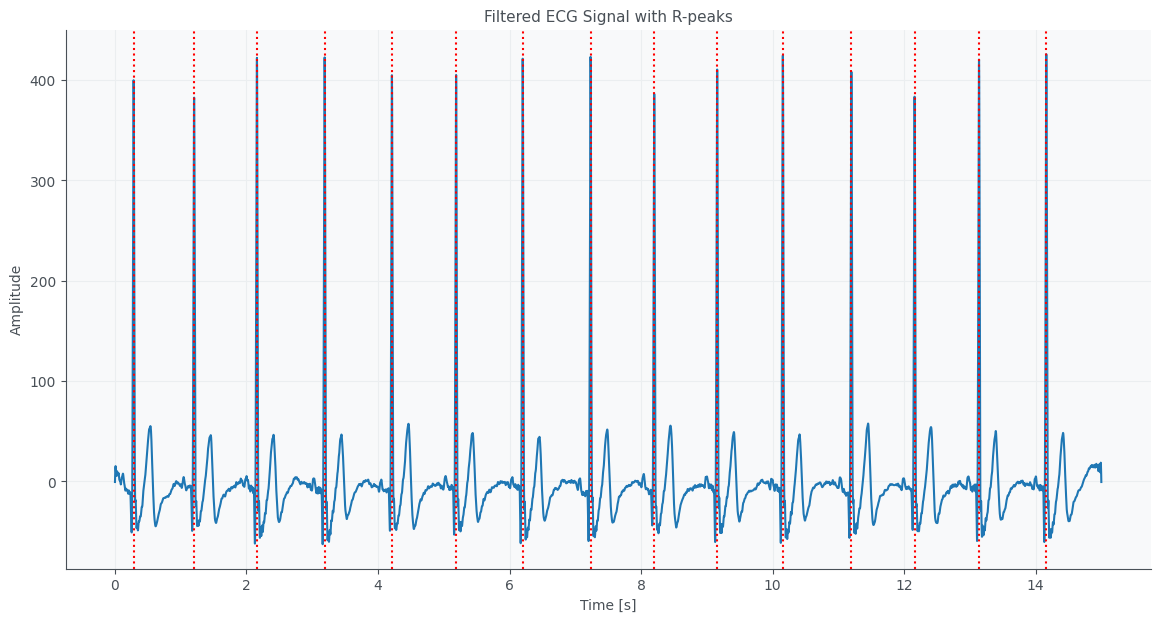

In [87]:
### TODO

full_filtered_signal = results['filtered']
rpeaks_biosppy = results['rpeaks']

time = [i/SAMPLING_RATE for i in range(len(signal))]

# Plot the filtered ECG signal
plt.figure(figsize=(14, 7))
plt.plot(time, full_filtered_signal)
plt.title('Filtered ECG Signal with R-peaks')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Mark R-peaks with vertical lines
for rpeak in rpeaks_biosppy:
    plt.axvline(x= rpeak/SAMPLING_RATE, color='r', linestyle=':')

plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [88]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

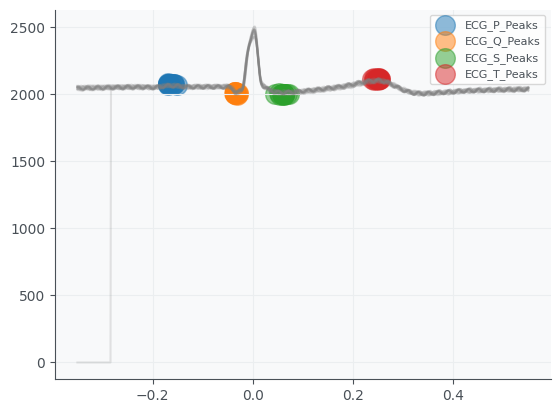

In [89]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal,
                                 results['rpeaks'],
                                 SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [90]:
# TODO Does the detection work well?
# Yes

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [91]:
!pip install sleepecg
from sleepecg import detect_heartbeats

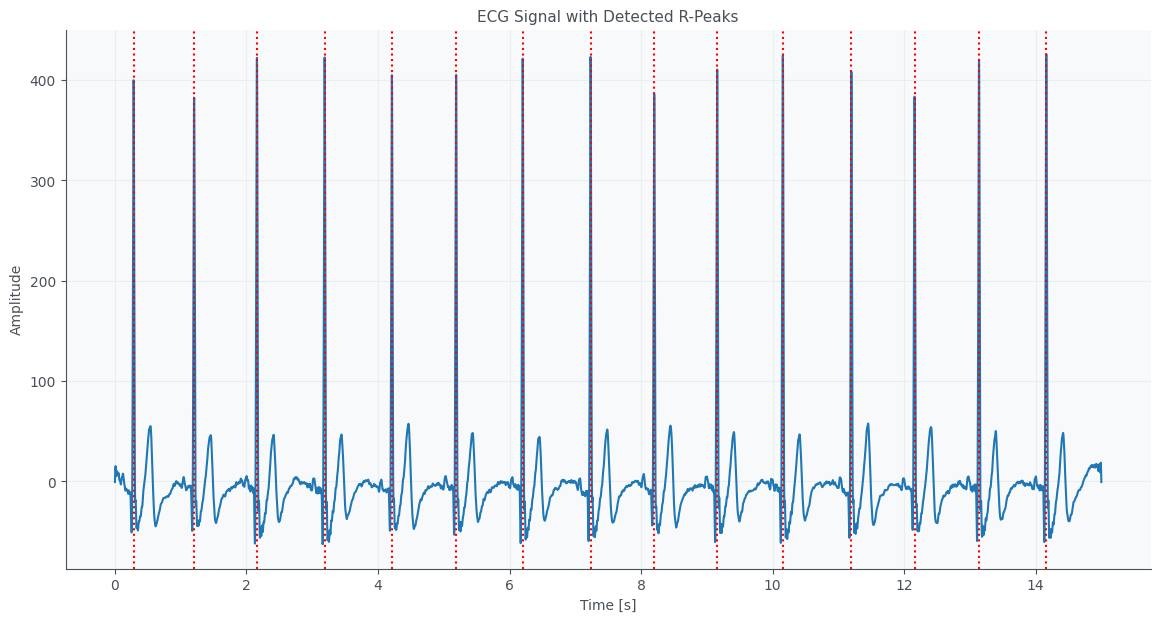

In [92]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

rpeaks_sleepecg = detect_heartbeats(signal, fs=SAMPLING_RATE)

time = [i/SAMPLING_RATE for i in range(len(signal))]

# Plot ECG signal
plt.figure(figsize=(14, 7))
plt.plot(time, results['filtered'])

# Mark R-peaks with vertical lines
for rpeak in rpeaks_sleepecg:
    plt.axvline(x=rpeak/SAMPLING_RATE, color='r', ls=':')

# Add labels and title
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected R-Peaks')

# Show the plot
plt.show()

In [93]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

peak_diff = np.abs(rpeaks_biosppy - rpeaks_sleepecg)

mse = np.mean(peak_diff**2)
print("MSE is", mse)

MSE is 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

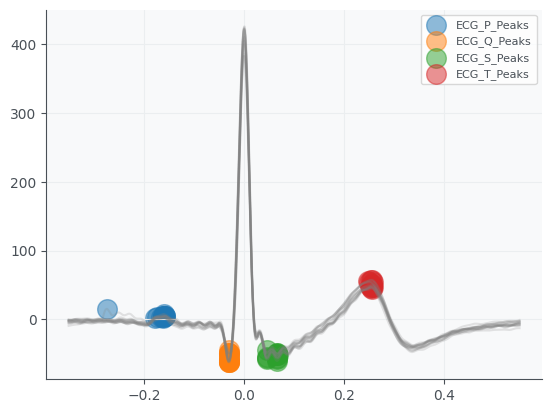

In [94]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(results['filtered'],
                                 results['rpeaks'],
                                 SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [95]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=5, highcut=30, method='butterworth', order=4)

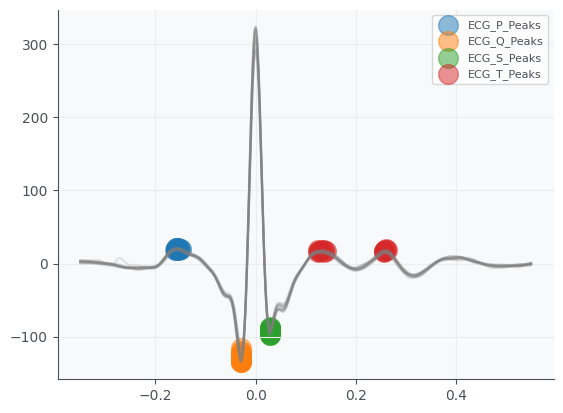

In [96]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(filtered_signal,
                                 results['rpeaks'],
                                 SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [97]:
# TODO Which one works the best?
# Filtered Signal

In [98]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#